## Сборный проект: планирование рекламных мероприятий на 2017 год, магазин игр.

### Оглавление
1. [Изучение датасета](#first)
2. [Подготовка данных](#second)
3. [Исследовательский анализ данных](#third)
4. [Портрет пользователей регионов](#forth)
5. [Проверка гипотез](#fifth)
    1. [Проверка гипотезы, что средние оценки по платформам равны](#fifth1)
    2. [Проверка гипотезы, что средние оценки пользователей по жанрам отличаются](#fifth2)
6. [Вывод](#sixth)


### Описание проекта:
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1: Открытие и изучение датасета <a name="first"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
plt.style.use('seaborn-pastel')

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9613,Aikatsu! 365 Idol Days,3DS,2014.0,Adventure,0.00,0.00,0.13,0.00,NaN,NaN,NaN
2762,Resident Evil: Revelations,PS3,2013.0,Action,0.14,0.29,0.22,0.09,74.0,7.2,M
5891,Pride FC: Fighting Championships,PS2,2003.0,Fighting,0.15,0.11,0.00,0.04,73.0,8.6,M
1936,NCAA Football 99,PS,1998.0,Sports,0.59,0.40,0.00,0.07,NaN,NaN,NaN
1163,Soul Edge,PS,1996.0,Fighting,0.61,0.41,0.46,0.10,NaN,NaN,NaN


### Шаг 2: Подготовка данных.  <a name="second"></a>

In [3]:
data.columns=data.columns.str.lower() #приведем названия столбцов к нижнему регистру
#приведем все текстовые столбцы к нижнему регистру
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()
data.duplicated().sum()

data.loc[data['name'].isnull()]
data.dropna(subset=['name'], inplace=True)
#заменим все пропуски для удобства
data['year_of_release'] = data['year_of_release'].fillna(0)
data['user_score'].unique()
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].fillna(-3)
data['critic_score'] = data['critic_score'].fillna(-3)
data['rating'] = data['rating'].fillna('no rating')
#приведем данные в столбцах с годами к целым числам и в столбцах с оценками пользвателей к численному типу
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] #посчитаем общие продажи, сложив все столбцы с продажами
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
11753,dynasty warriors 3,xb,2002,action,0.06,0.02,0.0,0.00,70.0,8.9,t,0.08
7790,fighter within,xone,2013,fighting,0.11,0.07,0.0,0.02,23.0,3.0,t,0.20
14187,deer drive: legends,3ds,2012,action,0.03,0.00,0.0,0.00,-3.0,-3.0,t,0.03
5207,shaun palmer's pro snowboarder,gba,2001,sports,0.26,0.10,0.0,0.01,58.0,-3.0,e,0.37
11459,little league world series baseball 2010,ps3,2010,sports,0.07,0.00,0.0,0.01,61.0,-3.0,e,0.08


- Пропущенные значения есть в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.
- В столбцах `name`и `genge` всего по два пропуска и все они в одних и тех же строках.  
Если так посмотреть, то об этих двух играх известно только то, что они выпущены в 93м году. Анализировать данные с таким количеством пропущенных значений нет смысла, поэтому я считаю, что будет логично их удалить, на общую картину они не повлияют. 
Скорее всего при переносе данных была допущена ошибка, из-за чего не сохранилось даже название. 
- Пропуски в годах мы можем заполнить только нулями, т.к. это означает, что год выпуска игры неизвестен и здесь не поможет среднее или медианное значение.
- Погуглив, мы выяснили, что tbd - это To Be Determined, что означает "будет определено". Фактически это те же NaN, но в отличие от пропусков, они делают столбец `user_score` типа "object".
- Пропуски в оценках критиков и пользователей я заменила на удобное отрицательное число, т.к. если заменять на ноль - это испортит статистику, т.к. оценка тоже может быть нулевой.   
Пропуски в столбцах с оценками можно объяснить тем, что оценки критиков и пользователей нормально собирались не всегда. Даже Rotten Tomatos был запущен только в 98м году, оценки на игры стали собирать еще позже. 
- В столбце `rating` я заполнила пропуски надписью "no rating".  
В столбце `rating` пропуски могут быть из-за некорректного переноса данных или из-за отсутствия рейтинга в данной системе.
Вообще оценка ESRB не является обязательной по закону в ряде стран и соблюдается в "добровольно-принудительном порядке", поэтому не все игры будут оценены. Плюс есть еще организация PEGI, которая так же оценивает игры по рейтингу, в некоторых странах используется именно данная маркировка, поэтому ESRB будет не обязательна. 
- Так же в рамках обработки данных был создан столбец `sales_total`, где посчитан тотал всех продаж игры. 

### Шаг 3: Исследовательский анализ данных <a name="third"></a>

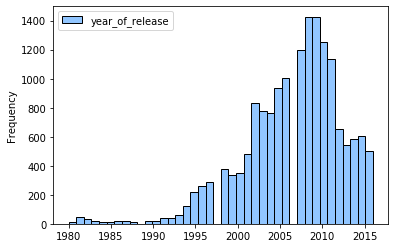

In [5]:
data[data['year_of_release'] != 0]['year_of_release'].plot(kind='hist', bins=40, ec='black').legend() #выводим диаграмму распределения по годам

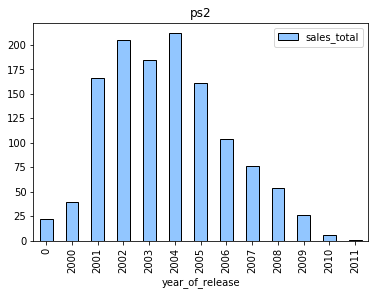

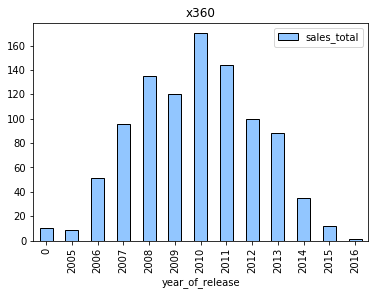

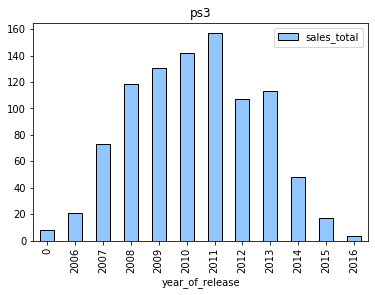

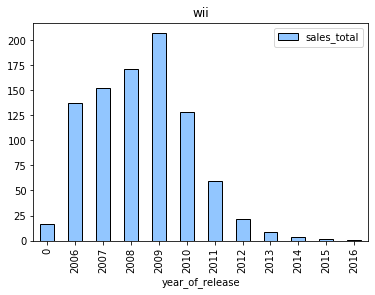

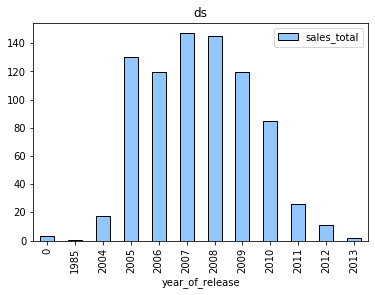

In [6]:
#создаем словарь топ-5 платформ
platform_pivot = data.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(
    by='sales_total', ascending=False)
platform_pivot = platform_pivot.head(5).reset_index()
top_platform_dict = platform_pivot['platform'].unique()
#выводим диаграммы для топ-5 платформ по общим продажам и по годам 
for platform in top_platform_dict:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales_total', aggfunc='sum').plot(kind='bar', ec='black')
    plt.title(platform)

У игр волнообразный цикл выхода. Сначала была совсем небольшная активность в 80-х. Невысокая активность скорее всего обусловлена недоступностью в то время компьютерной техники, и в игры тогда тоже играть было не так просто, нужны были определенные знания, чтобы все это запустить.  
После, в 92 и до 97го популярность была повыше, кстати, именно тогда появилась Денди (92й год). После, в 97 году игр не выходило.  
В 98м началось активное производство игр (кстати, тогда вышел популярный в свое время Dreamcast или просто Сега, как все ее называли). Здесь уже период был поактивнее, потому что там уже рядом был выход Play Station, да и в целом компьютеры претерпели уже массу изменений и стали более доступными (лично у меня доступ к компьютеру и играм появился в 1999 году, правда возможно это было обусловлено тем, что мой папа сисадмин). Этот цикл активности продлился до 2007 года. Потом снова перерыв в год, кстати именно тогда был бум неформалов, которые, конечно, в основном обитали в соцсетях и на форумах, а не в играх. Плюс, в 2007м не вышло ни одной известной и популярной консоли. 
Но в 2008м игровая индустрия вновь ожила. Хоть масштабных выпусков консолей в этом году не было, но возможно здесь тоже есть влияние предыдущего года. Подростки засели за технику, когда они доберутся до игр - вопрос времени. 
Этот цикл продолжался до 2016 года (тут у нас кончаются данные, это не означает конец цикла). Да, с 2012 года цикл пошел на спад, скорее всего из-за популярности мобильных телефонов/планшетов, на которых тоже стали появляться неплохие игры.  
Но игровая индустрия не собирается останавливаться в 2016м, т.к. в 2016 только вышла консоль PS4, а в 2017м готовится к выходу Xbox One.  

Если посмотреть на циклы жизни консолей, то в среднем они живут 10 лет. Причем есть консоли, которые, как wii сразу становятся весьма популярными, но довольно быстро сдуваются, а есть гиганты, которые может начинают и не очень (возможно потому что под них мало игр), но зато на следующий год и далее несколько лет подряд находятся на пике своей славы. И безусловные фавориты это PS и xbox.  
  


Что касается вопроса важности данных за все периоды, то для планирования 2017го года нам потребуется взять предыдущий 5-летний период - 2011-2016гг. Остальные периоды скорее всего использовать не будем. 

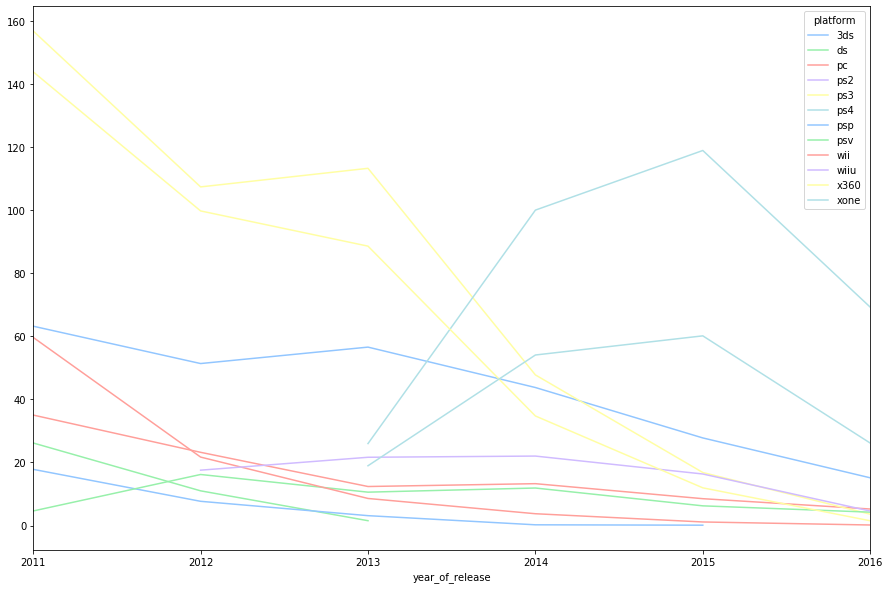

In [7]:
actual_data=data.query('year_of_release>2010') #создаем таблицу с отфильтрованными по дате данными (берем актуальный период 10 лет)
actual_data.pivot_table(index='year_of_release', columns = 'platform', values='sales_total', aggfunc='sum').plot(figsize=(15, 10))

Потенциально прибыльные платформы - ps4 и xone, продажи подскочили в 2015м, несколько снизились в 2016, но все равно выглядят многообещающе. Eще можно выделить 3ds, продажи стартовали в 2011, они не особо высокие, но в 2016м году они выше остальных консолей. 
В 2017м году планируется к выходу Nintendo Switch, но многие пользователи скорее всего продолжат в новом году пользоваться 3ds. 

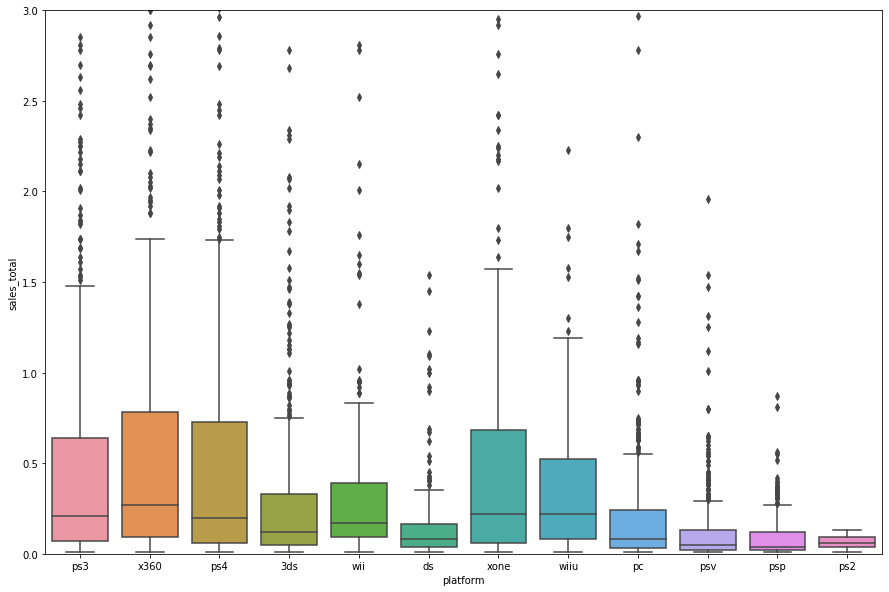

In [8]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='sales_total',data=actual_data)#выводим диаграмму размаха

Лучше всего дела с продажами обстоят у x360, PS4, xone и ps3. Здесь так же есть не очень популярные платформы, такие как psp и psv. PS3 скорее всего просто начинает сдавать свои позиции, когда народ в ожидании ps4. 3ds и ds популярнее всего в Японии, то есть только в одном регионе, а игры на PC уже можно скачать из интернета:)

0.38011114718290767

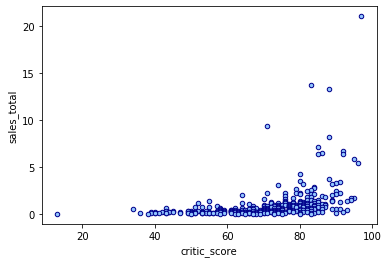

In [9]:
#фильтруем данные по популярной платформе (PS3) и выводим диаграмму рассеивания по оценкам критиков
ps3_data = actual_data.query('platform == "ps3" and critic_score != -3')
ps3_data.plot(kind='scatter', x='critic_score', y='sales_total', ec='darkblue')
ps3_data['sales_total'].corr(ps3_data['critic_score'])

Связь умеренная, судя по корреляции. И в самом деле от 20 до 70, то есть при средней оценке, продажи на низком уровне. Продажи растут, когда оценки от 70 и выше. 

0.014089348308019395

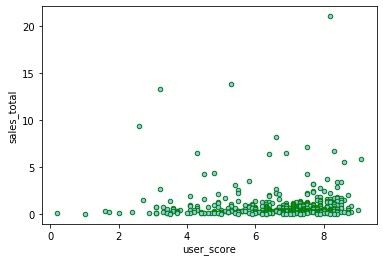

In [10]:
#фильтруем данные по популярной платформе (PS3) и выводим диаграмму рассеивания по оценкам пользователей
ps3_data = actual_data.query('platform == "ps3" and user_score != -3')
ps3_data.plot(kind='scatter', x='user_score', y='sales_total', ec='green')
ps3_data['sales_total'].corr(ps3_data['user_score'])

0.3912533245484554

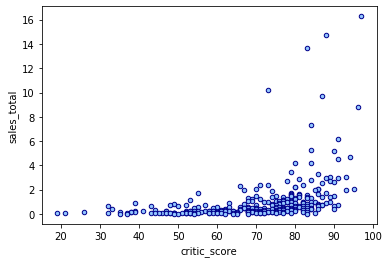

In [11]:
x360_data = actual_data.query('platform == "x360" and critic_score != -3')
x360_data.plot(kind='scatter', x='critic_score', y='sales_total', ec='darkblue')
x360_data['sales_total'].corr(x360_data['critic_score'])

0.0389181707291026

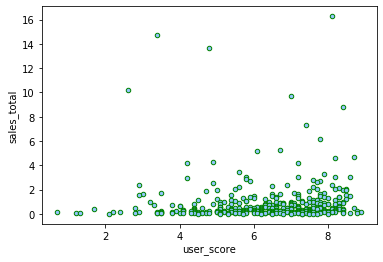

In [12]:
x360_data = actual_data.query('platform == "x360" and user_score != -3')
x360_data.plot(kind='scatter', x='user_score', y='sales_total', ec='green')
x360_data['sales_total'].corr(x360_data['user_score'])

0.41699832800840175

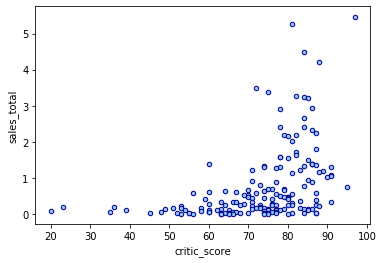

In [13]:
xone_data = actual_data.query('platform == "xone" and critic_score != -3')
xone_data.plot(kind='scatter', x='critic_score', y='sales_total', ec='darkblue')
xone_data['sales_total'].corr(xone_data['critic_score'])

-0.06892505328279412

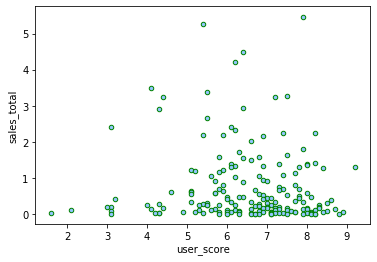

In [14]:
xone_data = actual_data.query('platform == "xone" and user_score != -3')
xone_data.plot(kind='scatter', x='user_score', y='sales_total', ec='green')
xone_data['sales_total'].corr(xone_data['user_score'])

Корреляция слабая. На графике видно, что хаотичные точки есть даже на низких оценках, но при высоких оценках есть повышение продаж. Только у xone обратная корреляция с оценками пользователей. И на диаграмме мы видим, что хаотичные точки продаж расположились везде после 4х. Это значит, что к оценкам пользователей покупатели игр для данной платформы практически не прислушиваются. 

##### В целом корреляция положительная, то есть между оценками критиков/пользователей и продажами игр есть взаимосвязь. Чем выше оценки критиков, тем немного больше продаж. Оценки пользователей на продажи влияют меньше. Это может быть вызвано тем, что люди больше доверяют экспертному мнению, потому что критики ставят оценки независимо, а простым пользователям может много чего не понравиться. 

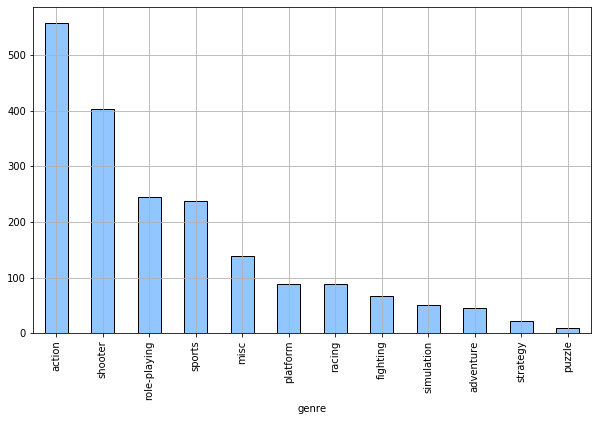

In [15]:
#создаем группировку по жанрам и суммарным общим продажам, выводим диаграмму.
genre=actual_data.groupby('genre')['sales_total'].sum().sort_values(ascending=False)
genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar', ec='black')

Больше всего продаж у игр жанра action, shooter, sports, при этом action имеет большой отрыв от конкурентов по количеству продаж. 

### Шаг 4: Портрет пользователя каждого региона <a name="forth"></a>

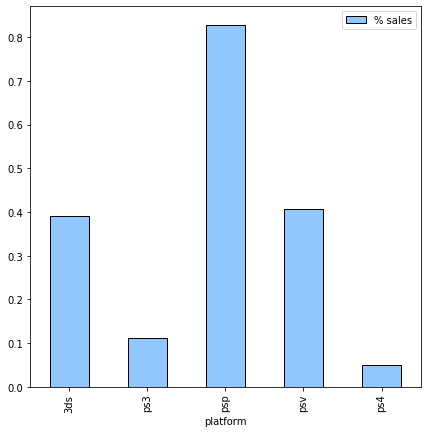

In [16]:
#создаем группировку по Японии с суммой общих и региональных продаж по платформам. Выводим группировку по топ5 платформам в регионе, согласно продажам
platform_pivot_jp = actual_data.pivot_table(index='platform',values=['jp_sales','sales_total'],aggfunc=('sum'))
platform_pivot_jp = platform_pivot_jp.sort_values(by='jp_sales',ascending=False).head(5)
platform_pivot_jp['% sales'] = platform_pivot_jp['jp_sales']/platform_pivot_jp['sales_total']
#выводим круговую диаграмму с процентным распределением продаж
platform_pivot_jp.plot(kind='bar', y='% sales', figsize=(7, 7), ec='black')

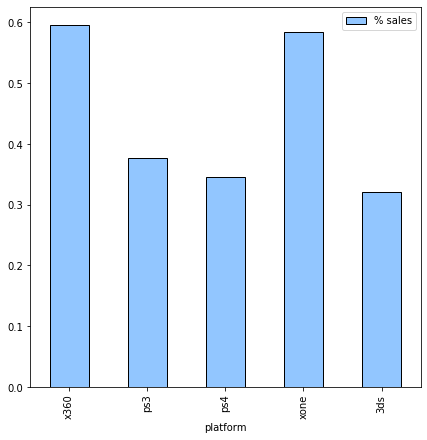

In [17]:
#создаем группировку по Америке с суммой общих и региональных продаж по платформам. Выводим группировку по топ5 платформам в регионе, согласно продажам
platform_pivot_na = actual_data.pivot_table(index='platform',values=['na_sales','sales_total'],aggfunc=('sum'))
platform_pivot_na = platform_pivot_na.sort_values(by='na_sales',ascending=False).head(5)
platform_pivot_na['% sales'] = platform_pivot_na['na_sales']/platform_pivot_na['sales_total']
#выводим круговую диаграмму с процентным распределением продаж
platform_pivot_na.plot(kind='bar', y='% sales', figsize=(7, 7), ec='black')

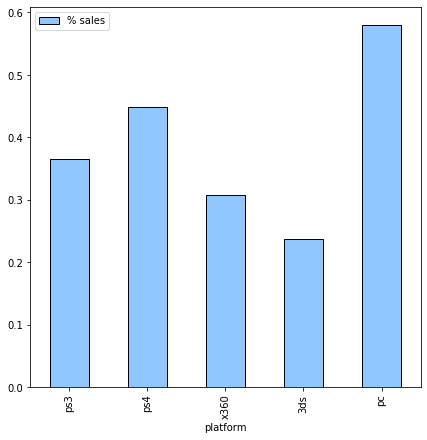

In [18]:
#создаем группировку по Европе с суммой общих и региональных продаж по платформам. Выводим группировку по топ5 платформам в регионе, согласно продажам
platform_pivot_eu = actual_data.pivot_table(index='platform',values=['eu_sales','sales_total'],aggfunc=('sum'))
platform_pivot_eu = platform_pivot_eu.sort_values(by='eu_sales',ascending=False).head(5)
platform_pivot_eu['% sales'] = platform_pivot_eu['eu_sales']/platform_pivot_eu['sales_total']
#выводим круговую диаграмму с процентным распределением продаж
platform_pivot_eu.plot(kind='bar', y='% sales', figsize=(7, 7), ec='black')

Пока Америка и Европа занимают разные стороны баррикад, выбирая между Xbox, Playstation и PC, в Японии предпочитают портативные консоли, т.к. только в их выборку популярных платформ попадает psp и psv и остается на волне популярности 3ds (хотя у последней еще имеются поклонники в Америке). 
В Америке и Европе же предпочтение отдается стандартным консолям, таким как ps3, ps4, wii, xone. Так же в Европе на самом пике популярности PC. Возможно здесь зарождаются споры, что лучше, PC или консоль. И Америка с Европой явно опять по разные стороны баррикад.  

В Японии же всегда атмосфера отличалась от других стран, они всегда выбирают что-то такое, что не выбирают жители остального мира. 
Скорее всего, т.к. это страна трудоголиков, поиграть они чаще могут только в дороге, отсюда популярность портативных устройств, плюс на них еще можно посмотреть аниме:)

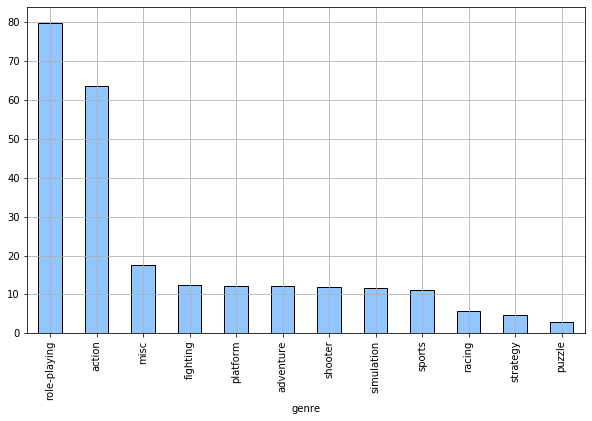

In [19]:
#фильтруем данные по региону и выводим диаграмму по популярным жанрам в Японии
genre_jp=actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
genre_jp.plot(y='genre',grid=True,figsize=(10,6),kind='bar', ec='black')

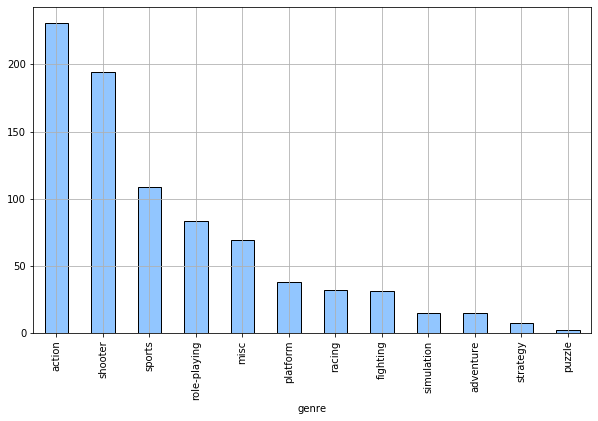

In [20]:
#фильтруем данные по региону и выводим диаграмму по популярным жанрам в Америке
genre_na=actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
genre_na.plot(y='genre',grid=True,figsize=(10,6),kind='bar', ec='black')

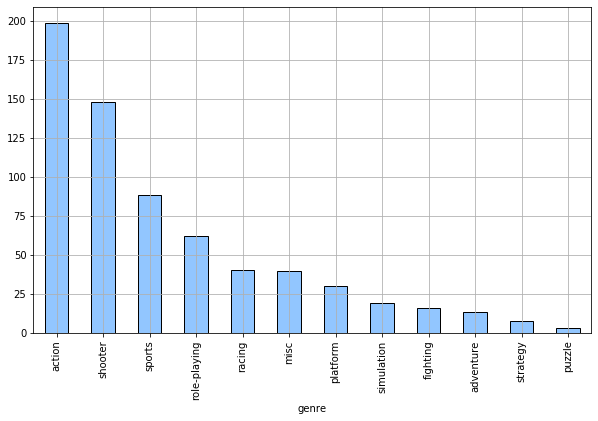

In [21]:
#фильтруем данные по региону и выводим диаграмму по популярным жанрам в Европе
genre_eu=actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
genre_eu.plot(y='genre',grid=True,figsize=(10,6),kind='bar', ec='black')

По жанрам Япония тоже отличилась, пока в остальном мире любят экшн, спортивные игры и шутеры, в Японии все любят ролевки. На втором месте здесь тоже экшн, а на третьем, я так понимаю, казуальные игры.  
Но вообще как раз ролевки в Японии всегда и были топовым жанром, они же их неплохо производят. 
И плюс часть их ролевок не выходит на международный рынок и производится только внутри. 

In [22]:
#Создаем группировку по рейтингу для каждой страны, с целью выявить какой рейтинг популярнее
na_esrb = actual_data.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))
na_esrb = na_esrb.sort_values(by='na_sales',ascending=False)
jp_esrb=actual_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))
jp_esrb = jp_esrb.sort_values(by='jp_sales',ascending=False)
eu_esrb = actual_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))
eu_esrb = eu_esrb.sort_values(by='eu_sales',ascending=False)

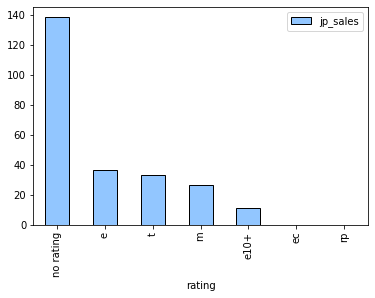

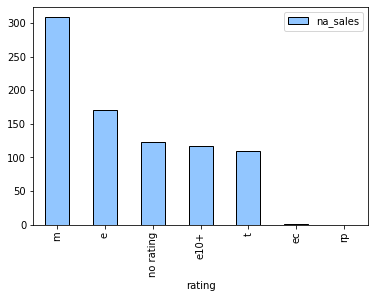

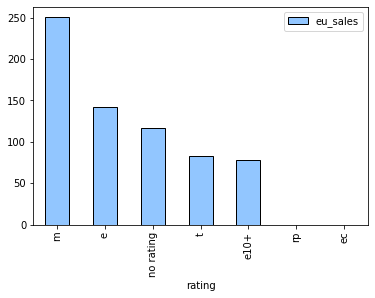

In [23]:
#Выводим гистограммы по рейтингу
jp_esrb.plot(kind='bar', ec='black')
na_esrb.plot(kind='bar', ec='black')
eu_esrb.plot(kind='bar', ec='black')

В Америке и Европе по продажам лидируют игры с рейтингом M - для взрослых. На втором месте E - для всех. На третьем игры без рейтинга. В Японии больше всего продаж у игр без рейтинга, возможно связано с тем, что в Азии другая система рейтингов и по сути на ESRB там особо не смотрят. Но на втором месте (с большим отрывом) там так же рейтинг Е - для всех. 
 

### Шаг 5: Проверка гипотез <a name="fifth"></a>

#### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a name="fifth1"></a>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.  

Нулевая гипотеза всегда формируется со знаком равенства. Альтернативная гипотеза показывает нам, что все варианты выше не равны.   
Значение alpha здесь ставлю 0.01, т.к. значения маленькие, следовательно погрешность должна быть минимальной. 

In [24]:
#создаю датасет, где отфильтровываю пропущенные значения
user_data = actual_data.loc[actual_data['user_score'] != -3]
#создаем датасет для каждой платформы
xone = user_data.query('platform == "xone"')
pc = user_data.query('platform == "pc"')
#считаем разницу дисперсий
var_xone = np.var(xone['user_score'], ddof=1)
var_pc = np.var(pc['user_score'], ddof=1)
display((var_pc - var_xone) / var_pc)

0.2654932295168501

In [25]:
#проверка гипотезы, что средние рейтинги по двум платформам равны
alpha = .01
results=st.ttest_ind(xone['user_score'],pc['user_score'],equal_var=False)

print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
display(xone['user_score'].mean())
pc['user_score'].mean()   

p-значение:  0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


6.521428571428572

6.451791530944625

Гипотеза с высокой вероятностью подтверждается. Среднее значение пользовательских рейтингов игр на Xone и PC лежит между около 6,5 баллов, что означает, что на обе платформы выпускаются достойные игры с оценками пользователей выше среднего. 

#### 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. <a name="fifth2"></a>

In [26]:
#создаем датасет для каждой платформы
action = user_data.query('genre == "action"')
sports = user_data.query('genre == "sports"')
#считаем разницу дисперсий
var_action = np.var(action['user_score'], ddof=1)
var_sports = np.var(sports['user_score'], ddof=1)
display((var_sports - var_action) / var_sports)

0.37142375943315425

In [27]:
#проверка гипотезы, что средние рейтинги по двум жанрам равны
results2=st.ttest_ind(sports['user_score'],action['user_score'],equal_var=False)

print('p-значение: ', results2.pvalue)
    
if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

display(action['user_score'].mean())
sports['user_score'].mean() 

p-значение:  8.285648549432565e-19
Отвергаем нулевую гипотезу


6.775903614457831

5.650813008130081

Нулевая гипотеза отвергнута, соответственно подтверждается первоначальная гипотеза. Здесь средние оценки жанра sports даже не дотягивают до 6, когда средние оценки action стремятся к 7. Возможно, это связано с тем, что игры action популярнее во всем мире. 

### Шаг 6: Общий вывод <a name="sixth"></a>

В целом можно увидеть, что на продажи игр влияют совершенно разные факторы. 
- Например, люди охотнее верят оценкам критиков, но все же прислушиваются и к оценкам игроков. 
- В основном покупаются игры с рейтингом для всех или с рейтингом "для взрослых" и "для подростков. 
- Японский рынок сильно отличается от европейского и американского - там предпочитают несколько другие жанры и платформы.
- Средний цикл жизни платформы составляет 10 лет, причем на 4-5 году жизни у платформы пик активности пользователей, и, как следствие, продаж.  
- Игровая индустрия в 2016 году находится в небольшом упадке, но это не значит, что она перестанет существовать. Наоборот, технологии развиваются, и можно полагать, что в будущем у индустрии найдется, чем нас удивить. 

В целом на 2017 год могу рекомендовать продолжать продажи на x360 игры для Америки, плюс обратить внимание, что в 2017 году выходит xone X и PS4. Т.к. в Америке кроме X360 и PS еще любят WII, можно так же проследить за выходом Nintendo switch и спросом на новые приставки. Но стоит помнить о циклах жизни приставок и спроса игр на них и не делать больших ставок на только что вышедшие консоли. 
Для Японии есть потенциал роста в жанре action, особенно, если в 2017 году появятся интересные новинки. Необходимо учитывать, что в Японии предпочитают портативные консоли стационарным, но конечно, конкуренцию этой категории в ближайшее время может составить активно развивающийся мобильный гейминг, на это тоже нужно обращать внимание.  
Для Европы, как и для Америки, стоит присмотреться к новым приставкам, тем более, что спрос на игры PS4 уже есть. Здесь есть потенциал роста в жанре Спорт, опять же, если в 2017м году появятся новинки.  
Текущий рынок тоже отбрасывать не стоит, продолжая продавать игры в любимых жанрах клиентам, чтобы делать их еще счастливее. 